<a href="https://colab.research.google.com/github/Nhatnguyen2001/AI_Exercise/blob/main/robot_2dof_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

 2. CREATE DATA

In [ ]:
import matplotlib.pyplot as plt
import math
import csv
import numpy as np
u=[]
z=[]
t1=np.arange(0,180.1,0.5)
t2=np.arange(0,180.1,0.5)
for i in t1:

  for j in t2:
    x=50*math.cos(math.radians(i))+40*math.cos(math.radians(i+j))
    y=50*math.sin(math.radians(i))+40*math.sin(math.radians(i+j))
    
    z.append(np.array((i,j,x,y)))
  u.extend(z)
#print(u)

In [ ]:
header = ['anpha', 'beta', 'x', 'y']
#header = [ 'x', 'y']
with open('robot_2b.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(u)


3. XỬ LÝ DỮ LIỆU

In [ ]:
data = pd.read_csv('robot_2b.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:2]
x=numpy_dataset[:,2:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
#print(x_train[0])
#print(y_train[0])

In [ ]:
print("Original data is:",x_train)
print("Shape of data is: ",x_train.shape)

Original data is: [[ 56.94592711  39.39231012]
 [-57.10100717  46.98463104]
 [-65.99711678  -9.64383467]
 ...
 [ 65.31538935 -13.51010306]
 [ -7.59232092  10.15508006]
 [ 76.93925521  42.49214229]]
Shape of data is:  (4263, 2)


In [ ]:
print("Original data is:",y_train)
print("Shape of data is: ",y_train.shape)

Original data is: [[   0.   80.]
 [ 110.   70.]
 [-135.  -85.]
 ...
 [  25.  -85.]
 [ 160. -170.]
 [  40.  -25.]]
Shape of data is:  (4263, 2)


4. TRAIN MODEL

In [ ]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.summary()
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 128, epochs = 2, validation_split = 0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 10,786
Trainable params: 10,786
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
117941/117941 [==============================] - 355s 3ms/step - loss: 17.9961 - acc: 0.9826 - val_loss: 1.3372 - val_acc: 0.9910
Epoch 2/2
117941/117941 [=================

5. KIỂM TRA KẾT QUẢ

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la',score[0])
print('do chinh xac kiem tra',score[1])

sai so kiem tra la 0.5638691782951355
do chinh xac kiem tra 0.9933879971504211


[[ 61.925087 170.97397 ]
 [ 66.78453    5.096967]
 [ 61.9086    99.97249 ]
 ...
 [ 66.38549  100.630104]
 [ 22.472895  37.44293 ]
 [  8.542823  21.977472]]


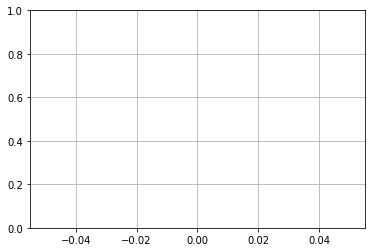

In [ ]:
import pandas as pd
score = model.evaluate(x_test,y_test,verbose = 0)
y_pred = model.predict(x_test)
print(y_pred)
pd.DataFrame(history.history)
plt.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


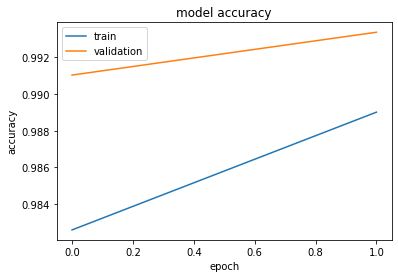

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()

6. TEST THỰC NGHIỆM

In [ ]:
Px_test_train = 50
Py_test_train = 40
print(Px_test_train,Py_test_train)
test = model.predict([[Px_test_train,Py_test_train]])
t1 = test[0][0]
t2 = test[0][1]
x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))
print('x = ',x_1,'y = ',y_1)
print(t1,t2)

50 40
x =  49.86796327951525 y =  40.0282180319164
0.032585174 90.15653


7. LƯU MODEL

In [ ]:
model.save('Robot_2dof.h5')